In [149]:
import sys
sys.path.append('/home/lytq/Spatial-Transcriptomics-Benchmark/utils')
from sdmbench import compute_ARI, compute_NMI, compute_CHAOS, compute_PAS, compute_ASW, compute_HOM, compute_COM

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

import warnings
warnings.filterwarnings('ignore')

In [150]:
method = 'Seurat'
pred_key = 'seurat_clusters'
dataset = 'Mouse_Olfactory_Bulb'

data_folder = f'../data/{dataset}'
input_dir = f'../Results/results_old/{dataset}/{method}'
output_dir = f'../Results/results_new/{dataset}/{method}'
os.makedirs(output_dir, exist_ok=True)

file = input_dir
print(method)

Seurat


In [151]:
fontsize = 12
def plot_clustering(adata, out_path, show=True):
    fig, axes = plt.subplots(1, 1, figsize=(6, 6))
    sc.pl.spatial(adata, color='pred', ax=axes, show=False, spot_size=40)
    axes.set_title(method, fontsize=fontsize, fontweight='bold')
    axes.invert_yaxis()
    plt.tight_layout()
    
    plt.savefig(os.path.join(out_path, 'clustering.pdf'), format='pdf', bbox_inches='tight')
    plt.savefig(os.path.join(out_path, 'clustering.png'), dpi=300, bbox_inches='tight')
    if show:
        plt.show()
    

def plot_each_cluster(adata, out_path, show=True):
    fig, axes = plt.subplots(1, 7,figsize=(1.7*7, 1.5*2), sharex=True, sharey=True)
    axes = axes.ravel()

    for i in range(7):
        sub = adata[adata.obs['pred'].astype(int) == i+1]
        sc.pl.spatial(sub, spot_size=30, color='pred', ax=axes[i], legend_loc=None, show=False)
        axes[i].set_title(i+1)
        
    xmin = adata.obsm['spatial'][:, 0].min()
    xmax = adata.obsm['spatial'][:, 0].max()
    ymin = adata.obsm['spatial'][:, 1].min()
    ymax = adata.obsm['spatial'][:, 1].max()

    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([ymin, ymax])
        
    plt.subplots_adjust(wspace=0, hspace=0.05)
    plt.tight_layout()
    
    plt.savefig(os.path.join(out_path, 'each_cluster.pdf'), format='pdf', bbox_inches='tight')
    plt.savefig(os.path.join(out_path, 'each_cluster.png'), dpi=300, bbox_inches='tight')
    if show:
        plt.show()

================= Processing Seurat Mouse_Olfactory_Bulb =================
    Results saved to ../Results/results_new/Mouse_Olfactory_Bulb/Seurat
================= Finished Seurat Mouse_Olfactory_Bulb =================


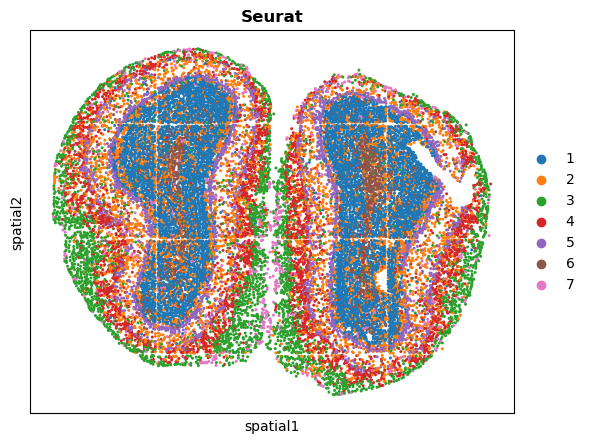

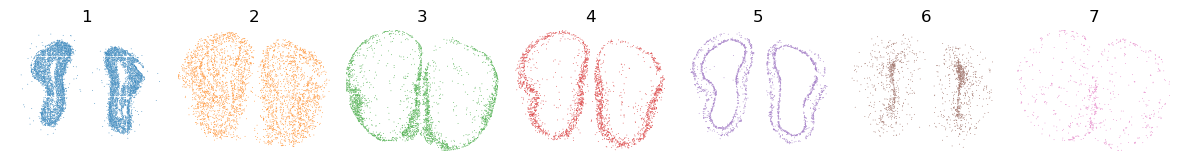

In [152]:
print(f'================= Processing {method} {dataset} =================')
out_path = output_dir
os.makedirs(out_path, exist_ok=True)

adata = sc.read_h5ad(os.path.join(data_folder, 'raw1.h5ad'))
adata.var_names_make_unique()

metadata = pd.read_csv(input_dir + '/cell_metadata.csv', index_col=0)
metadata = metadata.loc[adata.obs.index]


# Match adata and metadata 
# adata = adata[adata.obs.index.isin(metadata.index)]

pred = metadata[pred_key].values
if min(pred) == 0:
    pred += 1

adata.obs['pred'] = pred.astype(str)

plot_clustering(adata, out_path, show=False)
plot_each_cluster(adata, out_path, show=False)
print(f'    Results saved to {out_path}')
print(f'================= Finished {method} {dataset} =================')
# print(df_metrics)